# Clasyfication

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist["target"]

In [5]:
X = X / 256.

In [6]:
y = y.astype(int)

In [7]:
(pd.Series(y).value_counts()).sort_index()

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

In [8]:
(pd.Series(y).value_counts()/y.shape[0]).sort_index()

0    0.098614
1    0.112529
2    0.099857
3    0.102014
4    0.097486
5    0.090186
6    0.098229
7    0.104186
8    0.097500
9    0.099400
dtype: float64

<AxesSubplot:>

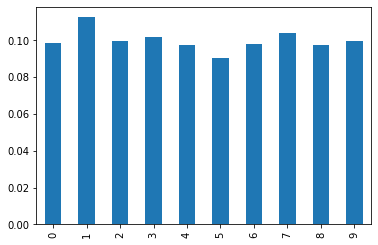

In [9]:
(pd.Series(y).value_counts()/y.shape[0]).sort_index().plot(kind='bar')

In [10]:
print(f"Data Type: {type(X)}\nX shape: {X.shape}\ny shape: {y.shape}")

Data Type: <class 'numpy.ndarray'>
X shape: (70000, 784)
y shape: (70000,)


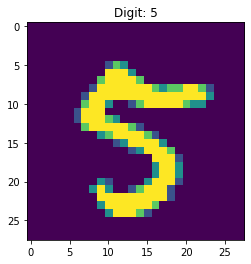

In [11]:
import matplotlib.pyplot as plt

def plot_digit(idx):
    ex_digit = X[idx].reshape(28, 28)

    plt.imshow(ex_digit)
    plt.title(f"Digit: {y[idx]}")
    plt.show()

plot_digit(512)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)
# X_train, y_train, X_test, y_test = train_test_split(X, y, 
#                                                     random_state=42,
#                                                     test_size=0.2)

<AxesSubplot:>

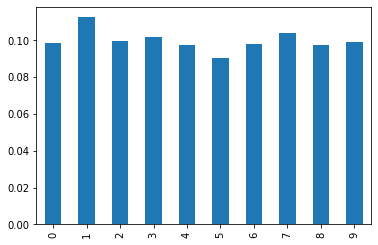

In [13]:
(pd.Series(y_test).value_counts()/y_test.shape[0]).sort_index().plot(kind='bar')

In [14]:
X_train.shape

(56000, 784)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# clf = SGDClassifier(max_iter=1000, tol=0.0001, random_state=42)
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/Users/kamilpabijan/Documents/SDA/Learning_repo/venv_app/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion Matrix

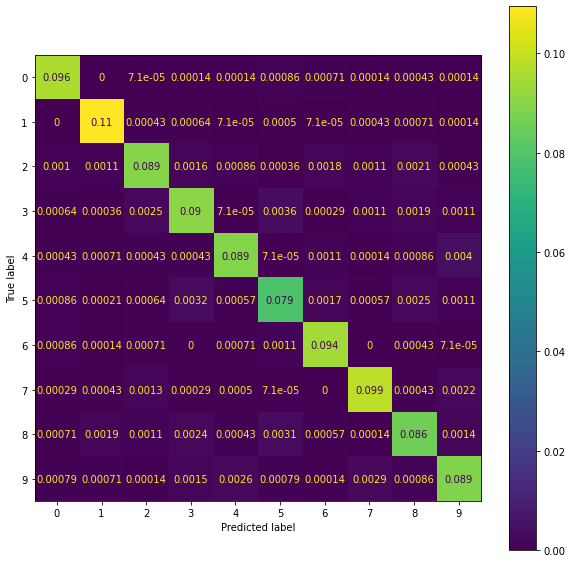

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test, y_pred))
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# print(f"TN: {tn}")
# print(f"FP: {fp}")
# print(f"FN: {fn}")
# print(f"TP: {tp}")
# #### MATRIX ROTATED!!!
fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all', ax=ax)
# disp.plot(ax = ax)
# plt.show()



In [18]:
from sklearn.metrics import precision_score, recall_score
print(f"Precision {precision_score(y_test, y_pred, average='micro')}")
print(f"Recall {recall_score(y_test, y_pred, average='micro')}")

Precision 0.9212142857142858
Recall 0.9212142857142858


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.95      0.97      0.96      1575
           2       0.92      0.90      0.91      1398
           3       0.90      0.89      0.89      1428
           4       0.94      0.92      0.93      1365
           5       0.88      0.87      0.88      1263
           6       0.94      0.96      0.95      1375
           7       0.94      0.95      0.94      1459
           8       0.89      0.88      0.89      1365
           9       0.89      0.89      0.89      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [22]:
pp = clf.predict_proba(X_test)

<hr>

In [30]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1381
           1       0.94      0.98      0.96      1575
           2       0.91      0.90      0.91      1398
           3       0.92      0.88      0.90      1428
           4       0.92      0.91      0.92      1365
           5       0.88      0.86      0.87      1263
           6       0.95      0.95      0.95      1375
           7       0.90      0.96      0.93      1459
           8       0.87      0.85      0.86      1365
           9       0.91      0.83      0.87      1391

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

